# Tarea 1

# Parte 1

**Escribir sobre papper analisis generador eolico aceites**

fsdfdsfdsfsdf

# Parte 2

## Lectura de datos

In [47]:
import scipy.io as sio
from scipy.fftpack import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

DatosD=sio.loadmat('DatosD.mat') 
DatosN=sio.loadmat('DatosN.mat') 

In [3]:
# Señal D
XD=list(DatosD["x"][:,0])
Dt=list(DatosD["t"][0])
ND = len(XD)  # Número de datos
FsD=DatosD["Fs"][0][0]/60  # Frecuencia de muestreo
dtD = 1/FsD # Espaciado
print(len(XD))
print(len(Dt))
print(ND)
print(FsD)
print(dtD)

2195456
2195456
2195456
1600.0
0.000625


In [4]:
# Señal N
XN=list(DatosN["x"][:,0])
Nt=list(DatosN["t"][0])
NN = len(XN)  # Número de datos
FsN=DatosN["Fs"][0][0]/60  # Frecuencia de muestreo
dtN = 1/FsN # Espaciado
print(len(XN))
print(len(Nt))
print(NN)
print(FsN)
print(dtN)

1998848
1998848
1998848
1600.0
0.000625


In [5]:
# velocidad de rotores hz
nD=1049/60
nN=1060/60

# Parte a)

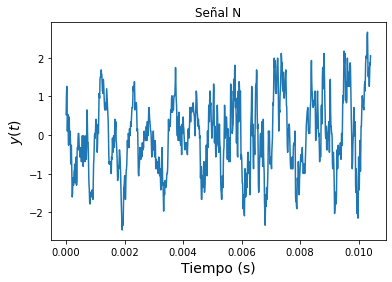

In [60]:
#graficar respuesta temporal N
plt.plot(Nt[0:1000], XN[0:1000])
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('$y(t)$', fontsize=14)
plt.title('Señal N')
plt.show()

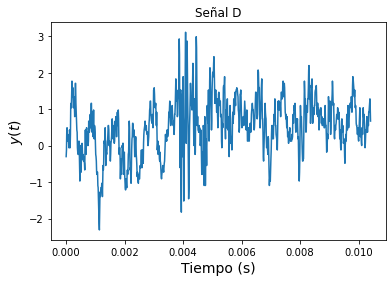

In [61]:
#graficar respuesta temporal D
plt.plot(Dt[0:1000], XD[0:1000])
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('$y(t)$', fontsize=14)
plt.title('Señal D')
plt.show()

**Analisis**

# Analisis de Fourier

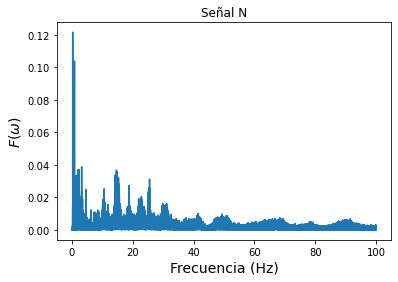

In [45]:
# Transformada de Fourier N
Y = fft(XN)[0:int(NN/2)]/(NN/2)
frq = fftfreq(NN,dtN)[0:int(NN/2)] #vector de frecuencias
df=pd.DataFrame({"modulo":abs(Y),"frecuencia":frq})
df_100=df[df["frecuencia"]<=100]
plt.plot(df_100["frecuencia"],df_100["modulo"])
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$F(\omega)$', fontsize=14)
plt.title('Señal N')
plt.show()

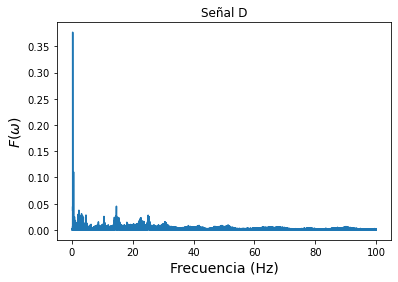

In [44]:
# Transformada de Fourier D
Y = fft(XD)[0:int(ND/2)]/(ND/2)
frq = fftfreq(ND,dtD)[0:int(ND/2)] #vector de frecuencias
df=pd.DataFrame({"modulo":abs(Y),"frecuencia":frq})
df_100=df[df["frecuencia"]<=100]
plt.plot(df_100["frecuencia"],df_100["modulo"])
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$F(\omega)$', fontsize=14)
plt.title('Señal D')
plt.show()

**Producto del gran solapamiento de frecuencias, se desprende que existen componentes aleatorias de vibración, para mitigar esto se la señal se dividirá en intervalos, calculando
el espectro a cada intervalo para luego obtener el promedio.**

**Ordenar codigo y filtrar con frecuencias menores a 100**

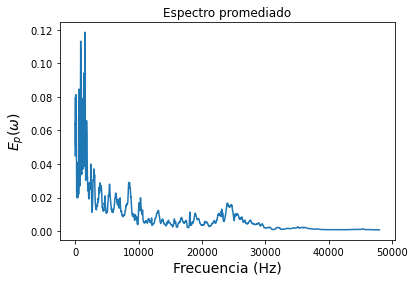

In [50]:
# señal N
L=5000 #largo de los segmentos
l=2500 #overlap 50%
N=NN 
Ns=math.floor((N-l)/(L-l))

Ep=np.zeros((int(L/2),))

for i in range(1,Ns+1):
    inicio=(i-1)*L-(i-1)*l
    fin=i*L-(i-1)*l
    window = signal.windows.hann(L)
    av=XN[inicio:fin]*window #segmento de datos con ventana
    e = fft(av)[0:int(L/2)]/(L/2)
    Ep=Ep+abs(e)/Ns

dt=Nt[1]-Nt[0]    
frq = fftfreq(L,dt)[0:int(L/2)]

plt.plot(frq,Ep)
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$E_p(\omega)$', fontsize=14)
plt.title('Espectro promediado')
plt.show()

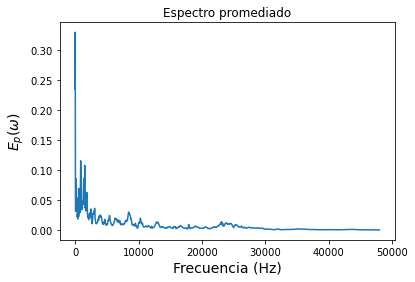

In [51]:
# señal D
L=5000 #largo de los segmentos
l=2500 #overlap 50%
N=ND 
Ns=math.floor((N-l)/(L-l))

Ep=np.zeros((int(L/2),))

for i in range(1,Ns+1):
    inicio=(i-1)*L-(i-1)*l
    fin=i*L-(i-1)*l
    window = signal.windows.hann(L)
    av=XD[inicio:fin]*window #segmento de datos con ventana
    e = fft(av)[0:int(L/2)]/(L/2)
    Ep=Ep+abs(e)/Ns

dt=Dt[1]-Dt[0]    
frq = fftfreq(L,dt)[0:int(L/2)]

plt.plot(frq,Ep)
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$E_p(\omega)$', fontsize=14)
plt.title('Espectro promediado')
plt.show()

# Análisis de envolvente

# Parte b)

**Interpretación, comparación y comentarios de los resultados**

gdsfgsdfgdsfgsdfgsd